# 决策树（Decision Tree）

决策树是一种常见的机器学习方法。常用于分类任务。

决策树，顾名思义，是基于树结构来进行决策的，这是人类在面临决策问题时的一种很自然的处理机制。

例如下图所示：

- 决策是否见约会对象

![决策树示例1](images\dt\dating.png)

- 决策是否外出

![决策树示例2](images\dt\outdoor.png)

## 基本流程

决策树的主要优势在于决策过程很容易理解。利用决策树形成的判断过程，同富有经验的领域专家几乎实现相同的。

下面我们分析一下决策树的基本处理流程。

以二分类任务为例，我们希望从给定训练数据集学得一个模型，用于对新示例进行分类，这个对样本进行分类的任务，可以看作对“当前样本属于正类么？”这个问题的“决策”或“判定”过程。

![决策树示例3](images\dt\西瓜问题决策树.png)

- 决策过程的最终结论（树的叶子），对应了我们希望的判定结果；

- 决策过程中提出的每个判定问题，都是对某个属性的“测试”；

- 每个测试的结果，要么导出最终结论，要么导出进一步的判定问题，其考虑范围是在上一次决策结果的限定范围之内；

一般地，一颗决策树，包含一个根节点，若干个内部结点，和若干个叶节点。

- 叶节点，对应决策结果；

- 其它节点，对应一个属性测试。

- 每个节点，包含的样本集合，根据属性测试的结果被划分到子节点中；

- 根节点，包含样本全集；

- 从根节点到每个叶节点的路径，对应了一个判定测试序列。

**决策树学习的目的，是为了产生一棵泛化能力强的决策树，基本流程遵循简单而且直观的“分而治之（divide-and-conquer）”策略。**




## 决策树的构造

如何根据训练集数据，建立决策树呢？

结合上面的基本过程，我们知道，决策树的每个节点对应了一个属性测试，在数据集中往往有一些属性是“好属性”，使用它们做测试，能够有“正确”的分类结果。


### 构造决策树的伪代码

输入1：训练集$D={(x_1,y_1),(x_2,y_2),...,(x_m,y_m)}$   
输入2：属性集$A = {a_1,a_2,...,a_d}$  
过程：函数 TreeGenerate(D,A)


生成结点；  

if D 中样本全属于同一类别C :  
&ensp;&ensp;&ensp;&ensp;将node标记为C类叶结点；  

if A = 空集 or D 中样本在 A 上取值相同 :    
&ensp;&ensp;&ensp;&ensp; 将 node 标记为叶结点，其类别标记为 D 中样本数最多的类；  
&ensp;&ensp;&ensp;&ensp; return；
    
从 A 中选择最优划分属性 $a_*$;  
for $a_*$ 的每一个值 $a_*^v$ :    
&ensp;&ensp;&ensp;&ensp;为node生成一个分支；  
&ensp;&ensp;&ensp;&ensp;令$D_v$表示D中在$a_*$上取值为$a_*^v$的样本子集；  
&ensp;&ensp;&ensp;&ensp;if $D_v$ 为空：  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;将分支结点标记为叶节点，其类别标记为D中样本最多的类；  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;return    
&ensp;&ensp;&ensp;&ensp;else：  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;以$TreeGenerate(D_v,A \ {a_*})$ 为分支结点；  
   
输出： 以node为根节点的一棵决策树。

此时，我们的问题聚焦到了“数据集上哪些特征在划分数据分类时，起决定性作用？”，换句话说，**“如何选择最优划分属性？”**

### 划分选择

为了找到最好的决策属性，我们需要评估每个属性。那么以何种标准来评估？

一般而言，随着划分过程不断进行，我们希望决策树的分支结点所包含的样本，尽可能属于同一类别，即结点的“纯度”（purity）越来越高。

如果可以度量，那么我们可以根据纯度来评估每个属性，找到最好的决策属性。

如何度量样本集合的纯度呢？

### 信息熵

“信息熵”（information entropy）是度量样本集合纯度最常用的一种指标。

假定当前样本集合D中第k类样本所占的比例为$p_k(k = 1,2,...,|y|)$，则$D$的信息熵定义为：

$Ent(D) = - \sum_{k=1}^{|y|}p_k \log_{2}p_k$    ——式（1）

Ent(D)的值越小，则D的纯度越高。熵在信息论中代表随机变量不确定度的度量，熵值越大，不确定性越高。

> 对熵的直观解释，可以参考https://blog.csdn.net/qq_39521554/article/details/79078917

假定离散属性a有V个可能的取值${a^1,a^2,...,a^v}$，若使用a来对样本集D进行划分，则会产生V个分支结点。

其中，第$v$个分支结点包含了D中所有在属性a上取值为$a^v$的样本，记为$D^v$。

根据式（1），计算出$D^v$的信息熵。

即当前集合$D^v$，设第k类样本所占的比例为$p_k^v(k = 1,2,...,|y^v|)$

$Ent(D^v) = - \sum_{k=1}^{|y^v|}p_k^v \log_{2}p_k^v$ 


下面给出计算$D^v$的香农信息熵的python程序代码

In [2]:
"""计算香农信息熵的python程序代码
"""
from math import log
from sklearn import neighbors,datasets
import pandas as pd

def calcShannonEnt(dataFrame):
    """
    功能：根据分类标记，计算某数据集的信息熵。
    输入：dataFrame，使用pandas.seriers类型给出的含有标记的数据集，标记信息为最后一列
    输出：shannonEnt，数据集按当前标记分类结果的信息熵值
    
    """  
    numEntries = dataFrame.shape[0] #s数据集示例数
    
    labelCounts = {} #定义字典，键为分类标记名，值为标记的计数值
    labelCounts.update(dataFrame.iloc[:,-1].value_counts())#为字典赋值,认为数据集最后一列为label
    
    shannonEnt = 0.0  # 设置香农信息熵初值为0.0
    for key in labelCounts:
        # 按公式求信息熵值
        prob = float(labelCounts[key])/numEntries
        
        shannonEnt -= prob * log(prob,2)    # 求以2为底的对数。
    return shannonEnt

def calcDatingDataSetEnt():
    dataframe = pd.read_csv("data\dating\datingTestSet.txt",header=None,sep='\t',names=['年飞机里程','周冰淇淋升数','游戏耗时比','心仪程度'])
    entropy = calcShannonEnt(dataframe)
    print("当前数据集的香农信息熵：%f"  % entropy)

calcDatingDataSetEnt()


当前数据集的香农信息熵：1.584702


上面的例子中计算得到的信息熵差别不大，我们再看一个例子。

这个例子是美国大选投票数据集，基本情况如下图所示：

![选举数据示例](images/dt/voteexample.png)

这个例子将计算一个投票数据集的熵值

In [3]:
def calcAllVoteFeaturesEnt():
    dataframe = pd.read_csv("data/vote/VoteTraining-cn.csv",header=0,sep=',')
    
    entropy = calcShannonEnt(dataframe)
    print("信息熵：%f"  % entropy)

calcAllVoteFeaturesEnt()

信息熵：0.996566


### 信息增益

假定离散属性a有V个可能的取值${a^1,a^2,...,a^v}$，若使用a对样本集D进行划分，则会产生V个分支结点，其中第v个分支结点包含了D中所有在属性a上取值为$a^v$的样本，记为$D^v$。

我们可以根据式（1）计算出$D^v$的信息熵，再考虑到不同的分支结点所包含的样本数不同，给分支结点赋予权重$\frac{|D^v|}{|D|}$，即样本数越多的分支终点的影响越大，于是可计算出用属性a对样本集D进行划分所获得的“信息增益”（information gain)。

$Gain(D,a) = Ent(D) - \sum_{v=1}^{V}\frac{|D^v|}{|D|}Ent(D^v)$  ——式（2）

一般而言，信息增益越大，则意味着使用属性a来进行划分所获得的“纯度提升”越大。

因此，我们可用信息增益来进行决策树的划分属性选择，即在选择“最好的”属性进行决策。

$a_* = argmax_{a \in A}Gain(D,a)$

著名的ID3决策树学习算法【Quinlan，1986】就是以信息增益为准则来划分属性。

下面程序的例子是以美国大选的投票数据样本集为例，选择最好划分属性的代码：

In [4]:
def calcInforGain(df,aFeature):
    """
    功能：按照上述公式计算用属性aFeature对样本集dataframe进行划分的信息增益。
    输入：数据集dataFrame；
          划分属性名aFeature；
    输出：（最好划分属性名称，最大信息增益值）
    """
    # 统计数据集的样本数量
    totalsampleCount = df.shape[0]
    # 统计属性a各值对应的样本数量
    sampleCounts = {} 
    sampleCounts.update(df[aFeature].value_counts())
    #print(sampleCounts)
    infogain = calcShannonEnt(df)
    for key,value in sampleCounts.items():
        subdf = df[df[aFeature] == key]
        infogain -= subdf.shape[0]/ totalsampleCount * calcShannonEnt(subdf)
    return infogain

def getBestDivideFeature(df):    
    featureInfoGains = {}    
    for colname in df.columns[:-1]:
        # 对非标记属性，计算其信息增益，标记属性为dataframe中最后一列
        infogain = calcInforGain(df,colname)
        featureInfoGains[colname] = infogain
    # 对已计算增益的结果进行排序
    bestFeature = sorted(featureInfoGains.items(),key =lambda item:item[1],reverse=True)[0]
    #print(featureInfoGains)
    return bestFeature

#dataframe = pd.read_csv("data/vote/VoteTraining-cn.csv",header=0,sep=',')        
#getBestDivideFeature(dataframe)    
dataframe = pd.read_csv("data/maloon/maloon2.txt",header=0,sep=',')        
getBestDivideFeature(dataframe.iloc[:,1:])    

('纹理', 0.3805918973682686)

根据计算信息增益，发现在投票数据集中，“医师费用冻结”属性对数据集进行划分的信息增益最大，于是我们将选择它作为划分属性。

划分结果如下：


In [5]:
dataframe = pd.read_csv("data/vote/VoteTraining-cn.csv",header=0,sep=',')
dict = {}
dict.update(dataframe["医师费用冻结"].value_counts())
subDList = {}
for colValue in dict.keys():
    subDList[colValue] = dataframe[dataframe["医师费用冻结"]==colValue]

print("按\"医师费用冻结\"进行划分:")
for i in subDList.items():
    print("    {}类的节点数为{}".format(i[0],i[1].shape[0]))

按"医师费用冻结"进行划分:
    n类的节点数为119
    y类的节点数为113


然后，决策树学习算法将对每个分支结点做进一步划分。

如上例中，通过“医师费用冻结”进行划分后，需要再次计算“最好划分属性”，对各分支结点所含数据集进行划分。

### 构建决策树的程序

选择最佳属性的过程一般需要多次，对每个分支结点进行上述操作，直至将所有属性都使用完毕。这样一棵决策树就建立起来了。

但是，大多数用户不需要这样的决策树，而是需要那种只通过3~5个属性值就能够进行分类的决策树。

这时需要由用户事先指定“树的深度”这个超参来构建决策树。

下面，根据上文中构造决策树的伪代码，我们编写决策树构建函数：

In [6]:
import pandas as pd

class Node:
    """决策树结点类"""
    def __init__(self):
        self._type = None
        self._label = None
        self._samples = pd.DataFrame()
        self._children = {}        
    
    @property    
    def type(self):
        return self._type
    
    @type.setter
    def setType(self,type):
        self._type = type
    
    @property    
    def label(self):
        return self._label
    
    @label.setter
    def setLabel(self,label):
        self._label = label
        
    @property
    def samples(self):
        return self._samples
    
    @samples.setter
    def setSamples(self,samples):
        if isinstance(samples, pd.DataFrame):
            self._samples = samples
    
    @property    
    def children(self):
        return self._children
    

    def addChildren(self,key,children):
        self._children[key] = children

    def getChildrenTypeList(self):
        cl = []
        for k,v in self._children.items():
            cl.append(v.type + '['+k+']')
        return cl
    
    def __str__(self):        
        return "Type:{},Label:{},Samples:{},Children:{} ".format(
                self._type,self._label,
                self._samples.index.tolist(),
                self.getChildrenTypeList())
def bfs(rootNode,depth = 0):
    print("{}{}".format('\t'*depth,rootNode))
    #print("Type:{},Label:{},Samples:{}".format(rootNode.type,rootNode.label,rootNode.samples.index.tolist()))
    for k,v in rootNode.children.items():
        bfs(v,depth + 1)
    return depth
        
              
    

下面的代码用于测试上述类定义

In [7]:
node = Node()
node.setType = 'root' 
child = Node()
node.addChildren('a=1',child)
child.setType = 'middle'
child2 = Node()
node.addChildren('a=2',child2)
child2.setType = 'middle'
ss = Node()
ss.setType = 'leaf'
ss1 = Node()
ss1.setType = 'leaf'
child.addChildren('b=1',ss)
child.addChildren('b=2',ss1 )
print(node)
bfs(node)

Type:root,Label:None,Samples:[],Children:['middle[a=1]', 'middle[a=2]'] 
Type:root,Label:None,Samples:[],Children:['middle[a=1]', 'middle[a=2]'] 
	Type:middle,Label:None,Samples:[],Children:['leaf[b=1]', 'leaf[b=2]'] 
		Type:leaf,Label:None,Samples:[],Children:[] 
		Type:leaf,Label:None,Samples:[],Children:[] 
	Type:middle,Label:None,Samples:[],Children:[] 


0

In [2]:
import pandas as pd

def createDT(dataFrame,depth):
    """
    功能：根据有标记数据集dataFrame，构建深度为depth的决策树
    输入：训练集 𝐷 = dataFrame ，属性名为dataframe的第0行
          树的深度为depth，默认值为3
    输出：一棵以嵌套字典表示的决策树  

    """
    # 生成结点
    node = Node()
         
    if len(dataFrame.iloc[:,-1].value_counts()) == 1:
        #若D 中样本全属于同一类别，则将node标记为C类叶结点
        node.setType = 'Leaf'
        node.setLabel = dataFrame.iloc[0,-1]
        node.setSamples = dataFrame    
        return node

    if len(dataFrame.iloc[:,:-1]) == 0 :
        # A = 空集 :
        # 将 node 标记为叶结点，其类别标记为 D 中样本数最多的类；
        # 注意，因为可能存在未知因素，会存在A上取值相同，但分类不同的示例。        
        tempdict = {}
        tempdict.update(dataFrame.iloc[:,-1].value_counts())  
        if tempdict:
            label = sorted(tempdict,key =lambda item:item[1],reverse=True)[0]  
        else:
            label = ''
        node.setType = 'Leaf' 
        node.setLabel = label
        node.setSamples = dataFrame
        return node
    
    valueIsUnique = False
   
    for feature in dataFrame.columns[:-1]:    
        if len(dataFrame[feature].value_counts()) > 1:
            # 属性集任一个属性的取值不唯一，就跳出
            break
        valueIsUnique = True
    if valueIsUnique :
        # D 中样本在 A 上取值相同 :
        # 将 node 标记为叶结点，其类别标记为 D 中样本数最多的类；
        # 注意，因为可能存在未知因素，会存在A上取值相同，但分类不同的示例。        
        tempdict = {}
        tempdict.update(dataFrame.iloc[:,-1].value_counts())        
        label = sorted(tempdict,key =lambda item:item[1],reverse=True)[0]        
        node.setType = 'Leaf' 
        node.setLabel = label
        node.setSamples = dataFrame      
        return node
  
    #从 A 中选择最优划分属性  𝑎∗ 
    
    aFeature = getBestDivideFeature(dataFrame)[0]    
    #print("  使用{}作为划分依据".format(aFeature))
    node.setType = "据\"{}\"划分".format(aFeature)
    node.setLabel = '未定'
    node.setSamples = dataFrame
    
    dict = {}
    dict.update(dataFrame[aFeature].value_counts())
    #print("dict内容：{}".format(dict))
    for colValue in dict.keys():
        keyname = aFeature+'='+colValue
        #对𝑎∗ 的每一个值  𝑎𝑣∗ ，为node生成一个分支 
        aBranchNode = Node()                      
        #令 𝐷𝑣 表示D中在 𝑎∗ 上取值为 𝑎𝑣∗ 的样本子集；
        dv = dataFrame[dataFrame[aFeature]==colValue]         
        if  dv.empty:
            # 若dv为空,将分支结点标记为叶节点，其类别标记为D中样本最多的类；
            tempdict = {}
            tempdict.update(dataFrame.iloc[:,-1].value_counts())        
            label = sorted(tempdict,key =lambda item:item[1],reverse=True)[0]              
            aBranchNode.setType = 'Leaf' 
            aBranchNode.setLabel = label
            aBranchNode.setSamples = dv
            # 将aBranchNode列为node的子节点           
            node.addChildren(keyname,aBranchNode)              
        else:    
            # 去除数据集Dv 中aFeature列后的样本
            subDv = dv.drop([aFeature],axis =1)            
            if depth == 0:
                #若当前树的深度已经达到要求，则将当前分支节点的其类别标记为D中样本最多的类
                tempdict = {}
                tempdict.update(subDv.iloc[:,-1].value_counts())        
                label = sorted(tempdict,key =lambda item:item[1],reverse=True)[0]              
                aBranchNode.setType = 'Leaf' 
                aBranchNode.setLabel = label    
                aBranchNode.setSamples = subDv
                # 将aBranchNode列为node的子节点                
                node.addChildren(keyname,aBranchNode)     
                continue
            # 以 createDT(subDv)  为分支结点；
            node.addChildren(keyname,createDT(subDv,depth-1))
    return node


下面我们以西瓜数据集进行测试

In [1]:
#dataframe = pd.read_csv("data/vote/votesimple.txt",header=0,sep=',')    
df = pd.read_csv("data1/maloon/maloon2.txt",header=0,sep=',')
d = df.iloc[:,1:]
dtree = createDT(d,depth = 5)
print('决策树：')
bfs(dtree)

NameError: name 'pd' is not defined

### 根据“投票训练数据”，建立决策树 *


In [82]:
df = pd.read_csv("data/vote/VoteTraining-cn.csv",header=0,sep=',')  

dt = createDT(df,depth = 10)
print('决策树：')
bfs(dt)

决策树：
Type:据"医师费用冻结"划分,Label:未定,Samples:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 

### 增益率*

上面的操作中，我们有意忽略了“编号”这一属性。如果把“编号”作为一个候选划分属性，计算它的信息增益会远大于其它候选划分属性。原因是“编号”产生的分支中，每个分支一个样本，纯度是最大的。然而，这样的决策树显然不具备泛化能力，无法对新样本进行有效预测。

以“信息增益”作为划分属性的选择标准，是有偏好的，即**信息增益准则对可取值数据较多的属性有所偏好（形成的分支越多，信息增益越大）**。

为了减少这种偏好带来的不利影响，著名的C4.5决策树算法[Quilan,1993]不直接使用信息增益，而是使用“增益率”（gain ratio）来选择最优划分属性。增益率定义为：

$Gain_ratio(D,a) = \frac{Gain(D,a}{IV(a)}$  ——式（3）

其中：$IV(a) = - \sum_{v=1}^{V} \frac{|D^v|}{|D|}\log_2 \frac{|D_v|}{|D|}$   ——式（4）

IV称为属性a的“固有值”（intrinsic value)。属性a的可能取值数目越多（即V越大），则IV(a)的值通常也会越大。

下面的程序用于计算属性a的IV值：

In [7]:
"""计算昆兰增益率的程序代码
"""
from math import log
from sklearn import neighbors,datasets
import pandas as pd

def calcShannonEnt(dataFrame):
    """
    功能：根据分类标记，计算某数据集的信息熵。
    输入：dataFrame，使用pandas.seriers类型给出的含有标记的数据集，标记信息为最后一列
    输出：shannonEnt，数据集按当前标记分类结果的信息熵值
    
    """  
    numEntries = dataFrame.shape[0] #s数据集示例数
    
    labelCounts = {} #定义字典，键为分类标记名，值为标记的计数值
    labelCounts.update(dataFrame.iloc[:,-1].value_counts())#为字典赋值,认为数据集最后一列为label
    
    shannonEnt = 0.0  # 设置香农信息熵初值为0.0
    for key in labelCounts:
        # 按公式求信息熵值
        prob = float(labelCounts[key])/numEntries
        
        shannonEnt -= prob * log(prob,2)    # 求以2为底的对数。
    return shannonEnt

def calcInforGain(df,aFeature):
    """
    功能：按照上述公式计算用属性aFeature对样本集dataframe进行划分的信息增益。
    输入：数据集dataFrame；
          划分属性名aFeature；
    输出：（最好划分属性名称，最大信息增益值）
    """
    # 统计数据集的样本数量
    totalsampleCount = df.shape[0]
    # 统计属性a各值对应的样本数量
    sampleCounts = {} 
    sampleCounts.update(df[aFeature].value_counts())
    #print(sampleCounts)
    infogain = calcShannonEnt(df)
    for key,value in sampleCounts.items():
        subdf = df[df[aFeature] == key]
        infogain -= subdf.shape[0]/ totalsampleCount * calcShannonEnt(subdf)
    return infogain

def calcQuinLanIV(dataFrame,aFeature):
    """
    功能：计算某数据集中某个列属性的Intrinsic Value。
    输入：dataFrame，使用pandas.seriers类型给出的含有标记的数据集，标记信息为最后一列
          aFeature，某个列属性
    输出：intrinsicvalue，数据集对某个属性计算出的属性固有值（IV)
    
    """  
    numEntries = dataFrame.shape[0] #s数据集示例数
    
    labelCounts = {} #定义字典，键为分类标记名，值为标记的计数值
    labelCounts.update(dataFrame[aFeature].value_counts())#为字典赋值,认为数据集最后一列为label
    #print(labelCounts)
    intrinsicvalue = 0.0
    for key in labelCounts:
        # 按公式求增益率iv
        prior = float(labelCounts[key])/numEntries        
        intrinsicvalue -= prior * log(prior,2)    # 求以2为底的对数。
        
    return intrinsicvalue
   
def calcGainRatio(dataFrame,aFeature):
    """
    功能：计算某数据集中某个列属性的昆兰增益率Gain ratio。
    输入：dataFrame，使用pandas.seriers类型给出的含有标记的数据集，标记信息为最后一列
          aFeature，某个列属性
    输出：gainratio，数据集dataFrame，对属性aFeature计算增益率
    
    """  
    gainratio = calcInforGain(dataFrame,aFeature) / calcQuinLanIV(dataFrame,aFeature)
    return gainratio


#dataframe = pd.read_csv("data/vote/VoteTraining-cn.csv",header=0,sep=',')        
#getBestDivideFeature(dataframe)    
dataframe = pd.read_csv("data/maloon/maloon2.txt",header=0,sep=',')        
dataframe.columns[1]
calcGainRatio(dataframe.iloc[:,1:],dataframe.columns[1])  



0.06843956584615818

需要注意的是**增益率准则对可取值数目较少的属性有所偏好**，因此C4.5算法并不是直接选择增益率最大的候选划分属性，而是使用了一个启发式：

- 先从候选划分属性中找出信息增益高于平均水平的属性

- 再从中选择增益率最高的。

下面的代码，是使用增益率准则选择最佳划分属性的例子：

In [9]:
def getBestDivideFeature(dataframe):    
    featureGainratios = {}    
    for colname in dataframe.columns[:-1]:
        # 对非标记属性，计算其信息增益，标记属性为dataframe中最后一列
        gainratio = calcGainRatio(dataframe,colname)
        featureGainratios[colname] = gainratio
    # 对已计算增益的结果进行排序
    bestFeature = sorted(featureGainratios.items(),key =lambda item:item[1],reverse=True)[0]
    #print(featureInfoGains)
    return bestFeature
dataframe = pd.read_csv("data/maloon/maloon2.txt",header=0,sep=',')        
dataframe.columns[1]
getBestDivideFeature(dataframe.iloc[:,1:])  


('纹理', 0.2630853587192754)

### 基尼指数（Gini index）*

前面两种（信息增益、增益率）方法，分别偏好“分支数量多的”、“分支数量少的”属性，第三种判决依据是“基尼指数”（Gini index）。

CART(Classification and Regression Tree)决策树[Breiman et al., 1984]使用基尼指数来选择划分属性。

数据集D的纯度可用基尼值来度量：

$ Gini(D) = \sum_{k=1}^{|y|}{\sum_{k^{'} \neq k}p_k p_{k^{'}}} = 1 - \sum_{k=1}^{|y|}p_k^2$  ————式（5）

$p_k$ 指数据集 D 中第k类样本所占的比例。$p_{k^{'}}$ 指数据集 D 中第$k^{'}$类样本所占的比例。

直观来说，Gini(D)反映了从数据集D中随机抽取两个样本，其类别标记不一致的概率。

因此，Gini(D)越小，则数据集D的纯度越高。

于是，我们在侯选属性集合A中，选择那个使得划分后属性指数最小的属性作为最优划分属性，即：

$a_* = argmin_{a \in A} Gini_index(D,a) $

下列程序，是使用基尼指数进行选择属性的程序:

In [1]:
def calcGini(dataFrame):
    """
    功能：计算某数据集中某个列属性的gini值。
    输入：dataFrame，使用pandas.seriers类型给出的含有标记的数据集，标记信息为最后一列;
          aFeature，某个列属性.
    输出：ginivalue，数据集对某个属性计算出的基尼值（随机抽取两个样本，其类别标记不一致的概率）
    
    """  
    numEntries = dataFrame.shape[0] #s数据集示例数
    
    labelCounts = {} #定义字典，键为分类标记名，值为标记的计数值
    labelCounts.update(dataFrame.iloc[:,-1].value_counts())#为字典赋值,认为数据集最后一列为label
    
    #print(labelCounts)
    gini = 1.0
    for key in labelCounts:
        # 按公式求增益率iv
        p = float(labelCounts[key])/numEntries        
        gini -= p*p    
        
    return gini

def calcGiniIndex(dataframe,aFeature):
    """
    计算数据集dataframe中，属性aFeature的基尼指数值
    """
    giniindex = 0.0
    
    sampleNum = dataframe.shape[0]
    labelCounts = {}
    labelCounts.update(dataframe[aFeature].value_counts())
    for key in labelCounts:
        prior = float(labelCounts[key])/sampleNum        
        giniindex += prior *  calcGini(dataframe[dataframe[aFeature] == labelCounts[key]])   # 求以2为底的对数。    
    return giniindex  

def getBestDivideFeature(dataframe):    
    featureGiniIndexes = {}    
    for colname in dataframe.columns[:-1]:
        # 对非标记属性，计算其信息增益，标记属性为dataframe中最后一列
        gainratio = calcGiniIndex(dataframe,colname)
        featureGiniIndexes[colname] = gainratio
    # 对已计算增益的结果进行排序
    bestFeature = sorted(featureGiniIndexes.items(),key =lambda item:item[1],reverse=True)[0]
    #print(featureInfoGains)
    return bestFeature
dataframe = pd.read_csv("data/maloon/maloon2.txt",header=0,sep=',')        
dataframe.columns[1]
getBestDivideFeature(dataframe.iloc[:,1:])  

NameError: name 'pd' is not defined

## 决策树剪枝（pruning）*

剪枝是决策树学习算法对付“过拟合”的主要手段，例如：限定树的深度。

在决策树学习中，为了尽可能正确分类训练样本，结点划分过程讲不断重复，有时会造成决策树分支过多。这样就可能因训练样本学习得过好，使模型过拟合。所以需要主动剪枝掉一部分树的分支，降低过拟合风险。

决策树剪枝的基本策略有“预剪枝”（prepruning）和“后剪枝”（post-pruning）。

### 预剪枝

预剪枝是指决策树生成过程中，对每个节点在划分前，先进性估计，若当前节点的划分不能带来决策树泛化性能提升，则停止划分并将当前结点标记为叶节点。

假设我们采用信息增益准则选择属性，我们选择属性“脐部”来对训练集进行划分，并产生了3个分支，如下图所示：

![选择属性“脐部”来对训练集进行划分](images/dt/未减枝的决策树.png)

但是，是否应该进行这次划分呢？预剪枝要对划分前后的泛化性能进行估计。

在划分前，所有样例集中在根节点。若不进行划分，则根据“构造决策树的伪代码”要将节点标记为叶节点，其类别标记为训练样例数最多的类别。

假设我们将这个叶节点标记为“好瓜”，用西瓜数据验证集(7个样本)对这个单节点决策树进行评估，有3个样例被分类正确，另外4个分类错误，于是验证集精度为$\frac{3}{7}*100% = 42.9%$

在用属性“脐部”划分后，验证集有5个样例被分类正确，验证精度$\frac{5}{7}*100% = 71.4% > 42.9%$。所以用“脐部”划分得以确定。

之后，依据决策前、决策后的精度计算，我们将否定使用“色泽”、“根蒂”进行划分，因为划分后精度低于或等于71.4%。最终产生的决策树是“决策树桩”（decision stump），如下图所示。

![选择属性“脐部”预减枝的决策树](images/dt/预减枝的决策树.png)

可以看出，预剪枝使决策树的很多分支都没有“展开”，这不仅降低了过拟合的风险，还显著减少了决策树的时间开销和预测时间开销。

但是，有些划分虽然暂时不能提升泛化性能，甚至降低了泛化性能，但在其基础上的后续划分却有可能使泛化性能提供。

预剪枝基于“贪心”本质，禁止这些分支咱开，给预剪枝决策树带来了欠拟合的风险。

### 后剪枝

先从训练集生成一个完整的决策树，然后自底向上地对非叶节点进行考查，若将该节点对应的子树替换为叶节点能够带来决策树泛化性能提升，则将该子树替换为叶节点。

假设我们得到了上面图4.5所示的决策树，容易计算该决策树的验证集精度为42.9%。

后剪枝首先考察图4.5种的结点6，或将其领衔的分支剪除，则相当于把6替换为叶节点。此时，决策树的验证精度提升至57.1%。

按这一思路，最后形成的决策树如下图所示：

![后减枝的决策树](images/dt/后减枝的决策树.png)

对比4.7与4.6，可以看出，后剪枝决策树通常比预剪枝决策树保留了更多分支。

一般情况下，后剪枝决策树的欠拟合风险很小，泛化性由于预剪枝决策树。

但是，后剪枝过程是在生成完全决策树之后进行的，并且要自底向上地对树中的所有非叶节点进行逐一考察，因此其训练时间开销比未减枝决策树和预剪枝决策树都要大。

### 泛化性能提升评估

如何判断决策树泛化性能提升了呢？可以使用性能评估方法，例如：

- 错误率、精度
- 查全率、查准率
- ROC、AUX



## 连续与缺失值*

### 连续值处理

上面的讨论是基于离散属性来生成决策树，现实学习任务中常会遇到连续属性，有必要讨论如何在决策树学习中使用连续属性。

**由于连续属性的可取值数目不再有限，因此不能直接根据连续属性的取值对结点进行划分。**

此时，连续属性离散化技术可派上用场。

最简单的策略是采用二分法（bi-partition）对连续属性进行处理，这正是C4.5决策树算法中采用的机制。

给定样本集D和连续属性a，假定a在D上出现了n个不同的取值，将这些值从小到大进行排序，记为${a^1,a^2,...,a^n}$，基于划分点t可将D分为子集$D_t^-$ 和$D_t^+$，其中$D_t^-$包含哪些在属性a上取值不大于t的样本，而$D_t^+$则包含哪些在属性a上取值大于t的样本。

显然，对于相邻近的属性取值$a^i$与$a^i+1$来说，t在区间$[a^i,a^{i+1})$ 中取任意值所产生的划分结果相同。因此，对连续属性a，我们可考察包含n-1个元素的候选划分点集合：

$T_a = \{\frac{a^i + a^{i+1}}{2}| 1 \leq i \leq n-1\}$  ——式（7）

> 根据【Quinlan，1993】的建议，可将划分点设为该属性在训练集中出现的不大于中位点的最大值，从而使得最终决策树使用得划分点都在训练集中出现过。

即把区间$[a^i,a^{i+1})$中位点$\frac{a^i + a^{i+1}}{2}$作为候选划分点。然后，我们就像离散属性值一样，来考察这些划分点，选取最优的划分点进行样本集合的划分。

例如，可对式（2）稍加改造：

$Gain(D,a) = max_{t \in T_a}Gain(D,a,t) = max_{t \in T_a} Ent(D) - \sum_{\lambda \in \{ -,+\}}^{V}\frac{|D_t^v|}{|D|}Ent(D_t^v)$  ——式（2）

其中$Gain(D,a,t)$是样本集D基于划分点t二分后得信息增益。于是，我们就可选择使Gain(D,a,t)最大化得划分点。

### 缺失值处理

现实任务中，常会遇到不完整样本，即样本得某些属性值缺失。例如：隐私问题、成本问题等造成得部分数据缺失。这种数据普遍存在，弃之不用会造成数据得浪费，但也不能简单得使用类似完整数据的应用方法。

我们需要解决两个问题：

- （1）如何在属性值缺失的情况下进行划分属性选择？
- （2）给定划分属性，若样本在该属性上的值缺失，如何对样本进行划分？

给定训练集D和属性a，令$\tilde{D}$表示D中在属性a上没有缺失值的样本子集。对于问题（1），显然我们仅可根据$\tilde{D}$来判断属性a的优劣。假定属性a有V个可取值${a^1,a^2,...,a^V}$，令$\tilde{D}^v$表示$\tilde{D}$中在属性a上取值为$a^v$的样本子集，$\tilde{D}_k$表示$\tilde{D}$中属于第k类${k=1,2,...|y|}$的样本子集，则显然有$\tilde{D} = \bigcup_{k=1}^{|y|}\tilde{D}_k$，$\tilde{D} = \bigcup_{v=1}^{V}\tilde{D}^v$。假定我们为每个样本x赋予一个权重$w_x$（在决策树学习开始阶段，根节点中个样本的权重初始化为1），并定义：

$\rho = \frac{\sum_{x \in \tilde{D}}w_x}{\sum_{x \in D}w_x}$   ——式（9）

$\tilde{p}_k = \frac{\sum_{x \in \tilde{D}_k}w_x}{\sum_{x \in \tilde{D}}w_x} ， 其中 (1 \leq k \leq |y|)$  ——式（10）

直观地看，对属性a，$\rho$表示无缺失值样本所占地比例，$\tilde{p}_k$表示无缺失值样本中第k类所占地比例，$\tilde{r}_v$则表示无缺失值样本中在属性a上取值$a^v$的样本所占的比例。显然，$\sum_{k=1}^{|y|}\tilde{p}_k = 1, \sum_{v=1}^{V}\tilde{r}_v = 1$。

基于上述定义，我们可以将信息增益的计算公式（2）推广为：

$Gain(D,a) = \rho \times Gain(\tilde{D},a) = \rho \times (Ent(\tilde{D}) - \sum_{v=1}^V \tilde{r}_v Ent(\tilde{D}^v)))$ ——式（12）

根据式（1），有：

$Ent(\tilde{D}) = -\sum_{k=1}^{|y|}\tilde{p}_k \log_{2}{\tilde{p}_k} $



对于问题（2），若样本x在划分属性上的取值已知，则将x划入与其取值对应的子结点，且样本权值在子节点中保持为$w_x$。若样本x在划分属性a上的取值未知，则将x同时划入所有子节点，且样本权值在属性值$a^v$对应的子节点中调整为$\tilde{r}_v w_x$。直观地看，这就是让同一个样本以不同地概率画入到不同地子节点中去。

C4.5算法使用了上述解决方案[Quinlan，1993]。

## 多变量决策树 *

若我们把每个属性视为坐标空间中地一个坐标轴，则d个属性描述地样本就对应了d维空间中的一个数据点，对样本分类意味着在这个坐标空间中寻找不同类样本之间的分类边界。决策树所形成的分类边界有一个明显的特点：**轴平行（axis-parallel），即它的分类边界由若干个与坐标轴平行的分类组成。**

（未完待续）

## sklearn库决策树分类器应用

上面的程序是构建决策树的示例。在实际应用中，我们往往使用较为成熟的第三方工具sklearn。

下面的示例中，使用sklearn.tree 中的DecisionTreeClassifier对投票数据进行预测。

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

def decisionTree(list):
    dataframe = pd.read_csv("data/vote/VoteTraining-cn.csv",header=0,sep=',')
    #data.describe()
    X = dataframe.iloc[:,:-1] #存放训练样本中无标记的数据
    X1 = pd.DataFrame() # sklearn的算法分类器大多只处理数值型矩阵，X1将存放数值化的样本
    for column in X.columns:
        X1[column] = X[column].apply(lambda x:1 if x=='y' else 2)
        
    y = dataframe.iloc[:,-1] # 存放标记    
    y1 = y.apply(lambda x:1 if x == "republican" else 2) # 对标记进行数值化
        
    # 使用决策树模型对X,y进行拟合，即生成决策树分类器
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X1, y1)
    # 对输入的list按上面生成的决策树分类器进行批量预测
    predict = clf.predict([list])     
    return predict[0]

def predict():
    dataframe = pd.read_csv("data/vote/Vote.csv",header=None,sep=',')    
    for index,row in dataframe.iterrows():
        #print(row.tolist()[:-1])
        row = row.apply(lambda x:1 if x=='y' else 2)
        result = decisionTree(row.tolist()[:-1])
        if result == 1:
            print("republican")
        else:
            print("democrat")
        
predict()

democrat
democrat
democrat
democrat
democrat
republican
republican


### 理解sklearn的决策树分类器

下面我们通过分析程序来理解上述决策树的基本情况：

In [81]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd


dataframe = pd.read_csv("data/vote/VoteTraining-cn.csv",header=0,sep=',')
#data.describe()
X = dataframe.iloc[:,:-1] #存放训练样本中无标记的数据
X1 = pd.DataFrame() # sklearn的算法分类器大多只处理数值型矩阵，X1将存放数值化的样本
for column in X.columns:
    X1[column] = X[column].apply(lambda x:1 if x=='y' else 2)
y = dataframe.iloc[:,-1] # 存放标记    
y1 = y.apply(lambda x:1 if x == "republican" else 2) # 对标记进行数值化

# 使用决策树模型对X,y进行拟合，即生成决策树分类器
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X1, y1)

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
    
print("n_nodes={}".format(n_nodes))
print("children_left={}".format(children_left))
print("children_right={}".format(children_right))
print("feature={}".format(feature))
print("threshold={}".format(threshold))

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

n_nodes=11
children_left=[ 1  2  3 -1 -1 -1  7 -1  9 -1 -1]
children_right=[ 6  5  4 -1 -1 -1  8 -1 10 -1 -1]
feature=[ 3 10  8 -2 -2 -2  2 -2  5 -2 -2]
threshold=[ 1.5  1.5  1.5 -2.  -2.  -2.   1.5 -2.   1.5 -2.  -2. ]
The binary tree structure has 11 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 3] <= 1.5 else to node 6.
	node=1 test node: go to node 2 if X[:, 10] <= 1.5 else to node 5.
		node=2 test node: go to node 3 if X[:, 8] <= 1.5 else to node 4.
			node=3 leaf node.
			node=4 leaf node.
		node=5 leaf node.
	node=6 test node: go to node 7 if X[:, 2] <= 1.5 else to node 8.
		node=7 leaf node.
		node=8 test node: go to node 9 if X[:, 5] <= 1.5 else to node 10.
			node=9 leaf node.
			node=10 leaf node.



## 决策树的图形化显示

上面构建的的决策树，不容易查看，我们能否借助图形化的方法来理解已经构建的决策树呢？

### 使用matplotlib显示节点

下面我们先尝试使用matplotlib的注解工具（annotations）来可视化自定义的节点。

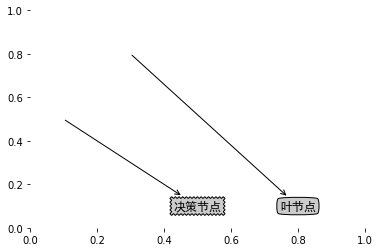

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# 设置显示中文
from matplotlib.font_manager import FontProperties 
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=10)

# 定义文本框和箭头格式
decisionNode = dict(boxstyle ="sawtooth",fc="0.8")
leafNode = dict(boxstyle = "round4",fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy = parentPt,xycoords="axes fraction",
                           xytext = centerPt,textcoords="axes fraction",
                           va = "center",ha="center",bbox=nodeType,arrowprops=arrow_args,fontproperties='SimHei',fontsize=12 )
def createPlot():
    fig = plt.figure(1,facecolor ="white")
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon=False)
    plotNode('决策节点',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()
createPlot()

### 使用matplotlib显示决策树

上面的图示显然还需要完善，下面我们尝试显示整棵树。

为了画出整棵树，需要知道树的层数有多高，有多少叶子节点，下面我们写两个函数来计算树的深度和叶子节点数。
